# Final Exam - Machine Learning 2019-1
Keep saving your notebook to guarantee that you don't lose your work. Whenever the end of the exam is announced save the current version. 

---

In [1]:
import numpy as np
import pylab as pl

%matplotlib inline

## First Question (1.0)

Consider the following kernel regression model:

$$ f_w(x) = w\phi(x) + w_0$$

where 

$$ w=\sum_{x_{i}\in X}\alpha_{i}\phi(x_{i}) $$

and $\phi()$ is the feature map associated to a kernel $k(\_,\_)$

Also consider the following loss function:

$$E(w, x, y) = | y -  f_w(x))|$$

Implement this model modifying the following functions:

In [2]:
def predict(alpha, X, kernel, x):
    '''
     alpha:  vector of shape (n,) where n is the number of samples
     X:      matrix of shape (n, 2) 
     kernel: a kernel function
     x:      vector of shape (2,)
    
    returns:
     the result of evaluating f_w(x)
    '''
    result = 0
    for i in range(len(X)):
        result += alpha[i]*kernel(X[i],x)
    # your code here
    #print(result)
    return result

def loss(alpha, X, kernel, x, y):
    '''
     alpha:  vector of shape (n,) where n is the number of samples
     X:      matrix of shape (n, 2), training input samples
     kernel: a kernel function
     x:      vector of shape (2,), input sample 
     y:      scalar, target output sample
    returns:
     the result of evaluating the loss function for a sample (x, y)
    '''
    # your code here
    perdida = np.abs(y-predict(alpha, X, kernel, x))
    #print(perdida)
    return perdida

def loss_without_abs(alpha, X, kernel, x, y):
    '''
     alpha:  vector of shape (n,) where n is the number of samples
     X:      matrix of shape (n, 2), training input samples
     kernel: a kernel function
     x:      vector of shape (2,), input sample 
     y:      scalar, target output sample
    returns:
     the result of evaluating the loss function for a sample (x, y)
    '''
    # your code here
    perdida = (y-predict(alpha, X, kernel, x))
    #print(perdida)
    return perdida


## Second Question (2.0)

Write an expression to calculate the gradient of the loss with respect to the alpha parameter:

$$ \frac{\partial E(w, x, y)}{\partial \alpha}= $$

Write a function that calculates the gradient:

In [3]:
def de_dalpha(alpha, X, kernel, x, y):
    '''
     alpha:  vector of shape (n,) where n is the number of samples
     X:      matrix of shape (n, 2), training input samples
     kernel: a kernel function
     x:      vector of shape (2,), input sample 
     y:      scalar, target output sample
    returns:
     a vector of shape (n, ) where the position i corresponds to dE(x)/d\alpha_i
    '''
    de = []
    for i in range(len(X)):
        if loss_without_abs(alpha, X, kernel, x, y) > 0:
            de = np.append(de, (kernel(X[i], x))*-1)
        else:
            de = np.append(de, (kernel(X[i], x))*1)
    # your code here
    #print('Bien')
    return de

## Third Question (2.0)

Implement batch gradient descent to train the model.

In [4]:

def loss_vectorized(alpha, X, kernel, Y):
    perdida_vector = 0
    for i in range(len(Y)):
        perdida_vector += loss(alpha, X, kernel, X[i], Y[i])
        
    perdida_vector = perdida_vector
    #pint(perdida_vector)
    return perdida_vector


def de_dalpha_vectorized(alpha, X, kernel, Y):
    derivada_vector = 0
    for i in range(len(Y)):
        derivada_vector += de_dalpha(alpha, X, kernel, X[i], Y[i])
        
    derivada_vector = derivada_vector
    #nt(derivada_vector)
    return derivada_vector




def train(X, Y, epochs, eta, alpha_ini, kernel):
    '''
     X:      matrix of shape (n, 2), training input samples
     Y:      vector of shape (n, ), training output samples
     epochs: number of epochs
     eta:    learning rate
     alpha_ini:  vector of shape (n,), initial values of alpha
     kernel: a kernel function
    returns:
     a tuple (alpha, losses) where:
       alpha: vector of shape (n, ) with resulting alpha values
       losses: a vector of shape (epochs, ) with the loss values for each epoch
    '''
    
    alpha = alpha_ini
    
    losses = loss_vectorized(alpha, X, kernel, Y)
    
    for i in range(epochs-1):
         alpha -= eta*de_dalpha_vectorized(alpha, X, kernel,Y)
         losses = np.append(losses, loss_vectorized(alpha, X, kernel, Y))   
            
    # your code here
    
    #pint(len(losses))
    return alpha, losses

[ 0.05908375  0.00458     0.0156145  -0.015633  ]
0.9583326249998905
0.9756049999999603
0.9428500624999478
-1.0678212500003257


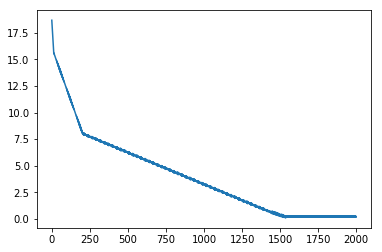

In [5]:
def k1(x, y):
    return np.dot(x, y)

def k2(x, y):
    return (np.dot(x, y) + 1) ** 2

X = [[-2, -1],
     [-1, 3],
     [2.5, -1.5],
     [4, 2]]
Y = [1, 1, 1, -1]
alpha, losses = train(X, Y, 2000, 0.000001, [0.1, 0.0, -0.1, 0.0], k2)
pl.plot(losses)
print(alpha)
for x in X:
    print(predict(alpha, X, k2, x))

# Grader
Run the following code to grade your exam

In [6]:
# Grader

def k1(x, y):
    return np.dot(x, y)

def k2(x, y):
    return (np.dot(x, y) + 1) ** 2

def test1():
    X = [[-2, -1],
         [-1, 3],
         [2.5, -1.5],
         [4, 2]]
    Y = [-1, 1, 1, -1]
    epsilon = 0.0001
    test1 = [1.85 , 6.6 , 7.7 , 0.7]
    test2 = [40.175 , 32.1 , 9.4 , 145.4]
    alpha = [0.5, 0.4, -0.5, 0.3]
    for i, x_i in enumerate(X):
        if abs(loss(alpha, X, k1, x_i, Y[i]) - test1[i]) > epsilon:
            return False
    for i, x_i in enumerate(X):
        if abs(loss(alpha, X, k2, x_i, Y[i]) - test2[i]) > epsilon:
            return False
    return True

def num_de_dalpha(alpha, X, kernel, x, y, epsilon):
    deltas = np.identity(len(alpha)) * epsilon
    de = np.zeros(len(alpha))
    for i in range(len(alpha)):
        de[i] = (loss(alpha + deltas[i, :], X, kernel, x, y) - 
                 loss(alpha - deltas[i, :], X, kernel, x, y)) / (2 * epsilon)
    return de

def test_de_dalpha(kernel):
    if not test1():
        return False
    num_tests = 100
    epsilon = 0.0001
    X = [[-2, -1],
         [-1, 3],
         [2.5, -1.5],
         [4, 2]]
    for i in range(num_tests):
        talpha = np.random.randn(len(X))
        tx = np.random.randn(2)
        ty = np.random.randn(1)
        if np.linalg.norm(de_dalpha(talpha, X, kernel, tx, ty) - 
                          num_de_dalpha(talpha, X, kernel, tx, ty, epsilon)) > epsilon:
            return False
    return True

def test2():
    return test_de_dalpha(k1) and test_de_dalpha(k2)

def evaluate_loss(alpha, X, kernel, X_test, Y_test):
    result = 0
    for i, x in enumerate(X_test):
        result += loss(alpha, X, kernel, x, Y_test[i])
    return result

def test3():
    if not test1():
        return False
    X = [[-2, -1],
         [-1, 3],
         [2.5, -1.5],
         [4, 2]]
    Y = [1, 1, 1, -1]
    alpha, losses = train(X, Y, 2000, 0.000001, [0.1, 0.0, -0.1, 0.0], k2)
    loss = evaluate_loss(alpha, X, k2, X, Y)
    if loss != losses[-1]:
        return False
    if loss < 5.0:
        return True
    else:
        return False
    alpha, losses = train(X, Y, 300, 0.001, [1, -2, 3, 0.0], k1)
    loss = evaluate_loss(alpha, X, k1, X, Y)
    if loss != losses[-1]:
        return False
    if loss < 5.0:
        return True
    else:
        return False


def evaluation():
    score = 0 
    for test, sc in [(test1, 10), (test2, 20), (test3, 20)]:
        if test():
            score += sc
    return score

print("Score: ", evaluation(), "/ 50")

Score:  50 / 50
